# DAML4 notes
## Week 8 - $k$-nearest neighbours and decision trees

<hr style="border:2px solid black"> </hr>


## $k$-NN classification

This simple classification algorithm doesn't have any parameters, and a single hyperpameter $k$. It does however require you to keep hold of your entire training set $\{\mathbf{x}^{(n)}, y^{(n)}\}_{n=0}^{N-1}$.

Given a test point $\mathbf{x}^{(t)}$:

1. compute the distance between $\mathbf{x}^{(t)}$ and every training point
2. identify the $k$ nearest training points i.e. those with the lowest distances away
3. classify $\mathbf{x}^{(t)}$ according to the mode class label of the nearest neighbours 

Let's generate some synthetic training data. Let's have 2D points split into three classes.

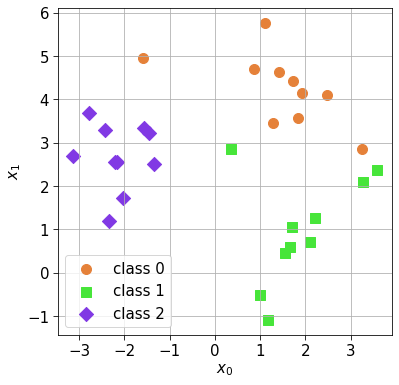

<IPython.core.display.Javascript object>

In [9]:
# Grouping cell imports here for tidiness
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.datasets import make_blobs

# This makes matplotlib output nice figures without much tweaking
plt.rcParams.update(
    {
        "lines.markersize": 10,  # Big points
        "font.size": 15,  # Larger font
        "xtick.major.size": 5.0,  # Bigger xticks
        "ytick.major.size": 5.0,  # Bigger yticks
    }
)

# We can use sklearn to make synthetic data.
# Let's create three blobby classes in 2D space
X, y = make_blobs(n_samples=30, centers=3, n_features=2, random_state=0)

# Define three colours for the classes
colours = ["#e58139", "#47e53a", "#8139e4"]

# Plot
fig, ax = plt.subplots(figsize=[6, 6])
ax.scatter(X[y == 0, 0], X[y == 0, 1], color=colours[0])
ax.scatter(X[y == 1, 0], X[y == 1, 1], color=colours[1], marker="s")
ax.scatter(X[y == 2, 0], X[y == 2, 1], color=colours[2], marker="D")
ax.grid()
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
plt.legend(["class 0", "class 1", "class 2"])
ax.set_xticks([-3, -2, -1, 0, 1, 2, 3])

Let's consider a test point placed at $\mathbf{x}_t=\begin{bmatrix}1&4\end{bmatrix}^\top$ for $K=3$. It will quite comfortably be put into class 0, but let's use sklearn to verify this.

In [10]:
# Get KNN model from sklearn
from sklearn.neighbors import KNeighborsClassifier

# Create model and fit to training data
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X, y)

# Predict class label at our test point
model.predict([[1, 4]])

array([0])

<IPython.core.display.Javascript object>

Great. In fact, we can plot the decision boundary of this classifier so we can see how all points in the above space would be classified. Sklearn makes this straightforward. 

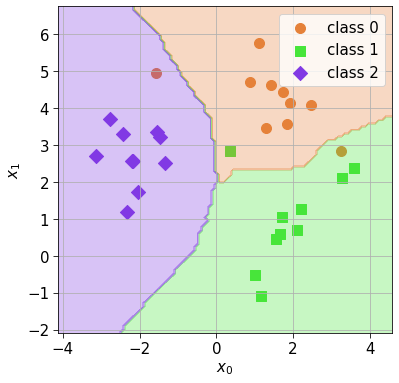

<IPython.core.display.Javascript object>

In [11]:
# Imports for plotting the decision boundary
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

# Repeat the plot from above
fig, ax = plt.subplots(figsize=[6, 6])
ax.scatter(X[y == 0, 0], X[y == 0, 1], color=colours[0])
ax.scatter(X[y == 1, 0], X[y == 1, 1], color=colours[1], marker="s")
ax.scatter(X[y == 2, 0], X[y == 2, 1], color=colours[2], marker="D")
ax.grid()
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
plt.legend(["class 0", "class 1", "class 2"])

# Add the decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    model,
    X,
    response_method="predict",
    alpha=0.3,
    grid_resolution=100,
    ax=ax,
    cmap=ListedColormap(colours),
)

Notice the boundaries are a bit rough. This is because the decision boundary is plotted by feeding in dummy points to the classifier. Increasing `grid_resolution` above feeds more dummy points in, so will give a sharper boundary at the cost of more computation time.

## Decision trees

Let's train a decision tree on the same training data. We will look at the actual training process later. 

A decision tree is best understood visually, so we will produce a diagram of our tree after training.

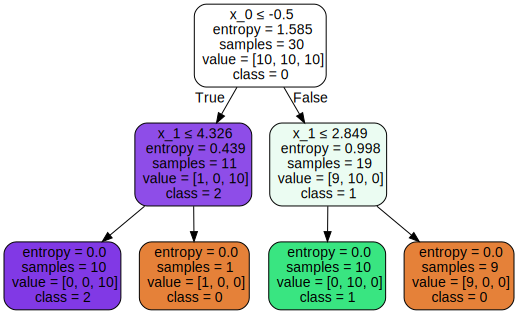

<IPython.core.display.Javascript object>

In [13]:
import sklearn
from sklearn.tree import DecisionTreeClassifier
import graphviz

# Create and train a tree
clf = DecisionTreeClassifier(random_state=0, criterion="entropy")
clf.fit(X, y)

# Use the graphviz package to render the tree
dot_data = sklearn.tree.export_graphviz(
    clf,
    out_file=None,
    feature_names=["x_0", "x_1"],
    class_names=["0", "1", "2"],
    filled=True,
    rounded=True,
    special_characters=True,
)

graph = graphviz.Source(dot_data)
graph

Let's traverse this tree for a test point $\mathbf{x}^{(t)}=\begin{bmatrix}0,2\end{bmatrix}^\top$:

- The first node checks whether $\mathbf{x}^{(t)}_0$ is less than or equal to $-0.5$. It is not, so we go down the "false" path on the right
- The next node checks whether $\mathbf{x}^{(t)}_1$ is less than or equal to $2.849$. It is, so we go down the "true" path on the left
- We're now at a leaf node, so we classify accordingly as class $1$.

We can check this with some code:

In [16]:
clf.predict(np.array([[0, 2]]))

array([1])

<IPython.core.display.Javascript object>

We can look at the decision boundary of the decision tree to get an idea of what would happen to points more generally.

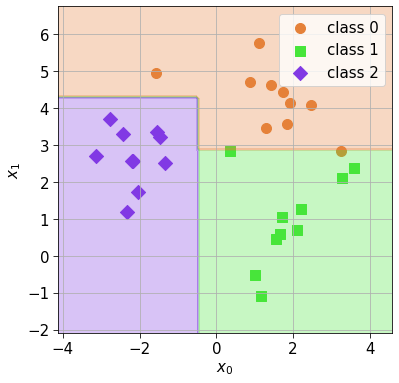

<IPython.core.display.Javascript object>

In [17]:
# Imports for plotting the decision boundary
from matplotlib.colors import ListedColormap
from sklearn.inspection import DecisionBoundaryDisplay

# Repeat the plot from above
fig, ax = plt.subplots(figsize=[6, 6])
ax.scatter(X[y == 0, 0], X[y == 0, 1], color=colours[0])
ax.scatter(X[y == 1, 0], X[y == 1, 1], color=colours[1], marker="s")
ax.scatter(X[y == 2, 0], X[y == 2, 1], color=colours[2], marker="D")
ax.grid()
ax.set_xlabel("$x_0$")
ax.set_ylabel("$x_1$")
plt.legend(["class 0", "class 1", "class 2"])

# Add the decision boundary
disp = DecisionBoundaryDisplay.from_estimator(
    clf,
    X,
    response_method="predict",
    alpha=0.3,
    grid_resolution=100,
    ax=ax,
    cmap=ListedColormap(colours),
)

The decision boundary is non-linear, but consists of a bunch of horizontal and vertical lines! Each node separates data points according to some threshold for one particular feature, and corresponds to one of these lines.

We haven't yet reminded ourselves of the training procedure. We start with a node that intends to splits the whole training set $Q_0$ into $Q_0^{left}$ and $Q_0^{right}$ according to

$$Q_0^{left}(d,t_0) = \{\mathbf{x}^{(n)}, y^{(n)}\}_{n:x^{(n)}_d\leq t_0}$$

$$Q_0^{right}(d,t_0) = \{\mathbf{x}^{(n)}, y^{(n)}\}_{n:x^{(n)}_d> t_0}$$

For this split to happen, we need to pick some threshold $t_0$ and a feature $d$. These are found by minimising

$$L_{0}=\frac{n_0^{left}}{n_0} H(Q_0^{left}(d,t_0))+ \frac{n_0^{right}}{n_0}H(Q_0^{right}(d,t_0))$$

where $n_0$, $n_0^{left}$, and $n_0^{right}$ are the number of points in $Q_0$,$Q_0^{left}$ and $Q_0^{right}$ respectively and $H$ is typically entropy or Gini impurity. We then grow two child nodes that intend to split $Q_0^{left}$ and $Q_0^{right}$ respectively and continue splitting and growing until we reach some maximum depth, or we have managed to separate all our classes.

## Random Forests

Random forests are an ensemble of trained decision trees. These employ bootstrap aggregation (bagging). This means that each tree is trained on a random sample of the data selected with replacement. Furthermore, at each new node when training only a subset of features are available to use for splitting (feature subsampling).

Bagging stops the overall ensemble from relying too much on individual data points, and feature subsampling does the same for features. This helps with generalisation. You will investigate random forests further in the lab, although you will be glad to know that they can be trained straightforwardly using sklearn!

<hr style="border:2px solid black"> </hr>

#### Written by Elliot J. Crowley and &copy; The University of Edinburgh 2022-23